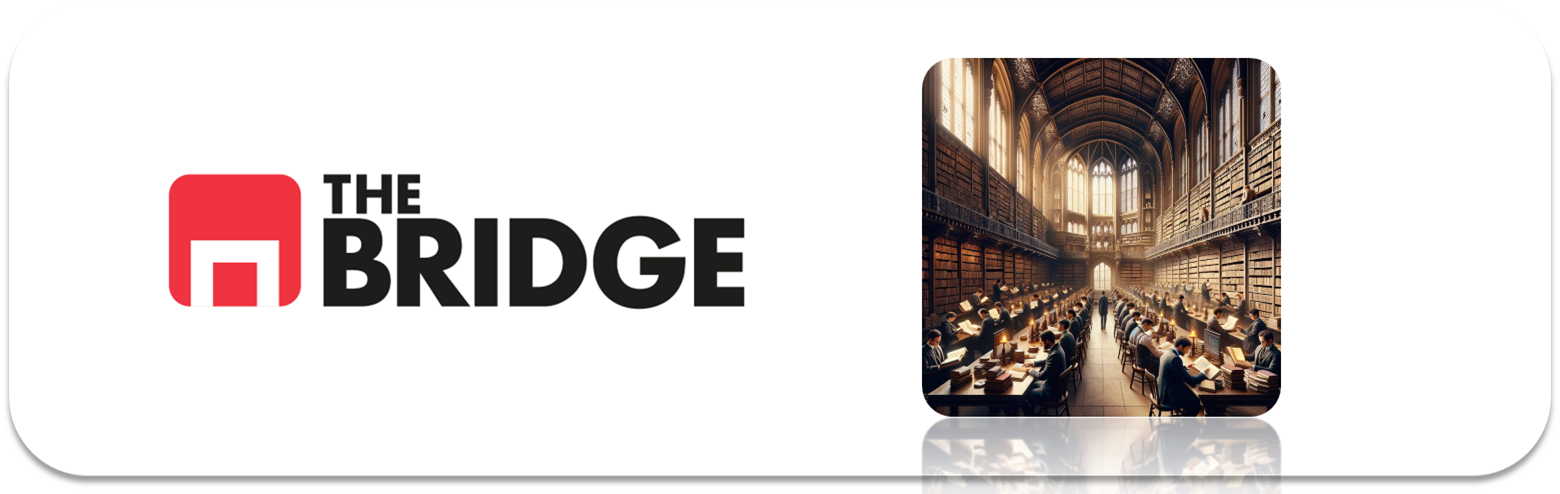

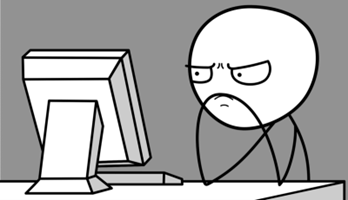

Para ejercitarte y afianzar lo aprendido sobre **NLP**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

## Twitter (now X) Sentiment Analysis
En este notebook vas a realizar un análisis de sentimientos sencillo sobre Tweets.

Estos programas son muy útiles en campañas de marketing, para monitorizar el lanzamiento de un nuevo producto, realizar seguimiento en Twitter de eventos, o simplemente tener monitorizadas ciertas cuentas o hashtags para tener un programa de análisis real time.

### Importa los datos

NOTA: Puedes descargártelos tal y como se muestra en la figura o bien emplear el fichero que hay en "data"

Vamos a utilizar un corpus de la [página del TASS](http://tass.sepln.org/tass_data/download.php), que se trata de una asociación de análisis semántico que encargada de recopilar texto y mantenerlo etiquetado.

![imagen](img/tass_register.png)

En este notebook se va a elegir un corpus genérico con no demasiados registros para aligerar la limpieza y entrenamiento de los modelos.

![imagen](img/download_train_spanish.png)

Lo ideal será siempre utilizar un corpus que sea afín a la temática que deseas predecir, por ejemplo si quieres monitorizar campañas de marketing, utiizar un corpus de texto que contenga comentarios acerca de la recepción a un determinado producto.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import pandas as pd
import xml.etree.ElementTree as ET
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from nltk.stem.snowball import SnowballStemmer
import xmltodict
import re
import bootcampviztools as bt



/home/vicevil/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
/home/vicevil/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


### Ejercicio 1

Lee el dataset y conviértelo a un dataframe. Tendrás que recordar lo visto cuando procesamos ficheros XML, inténtalo sin ver la solución :-)

In [2]:
with open('/home/vicevil/Documentos/GitHub/ONLINE_DS_THEBRIDGE_V/SPRING_17_M_L_WRAP_UP/UNIT_2_NLTP/EJERCICIOS/data/general-train-tagged.xml') as archivo:
    data = archivo.read()

In [3]:
tree = ET.parse(r'/home/vicevil/Documentos/GitHub/ONLINE_DS_THEBRIDGE_V/SPRING_17_M_L_WRAP_UP/UNIT_2_NLTP/EJERCICIOS/data/general-train-tagged.xml') 
root = tree.getroot()

In [4]:
for tweet in root:
    content = tweet.find('content').text
    print(content)

Salgo de #VeoTV , que día más largoooooo...
@PauladeLasHeras No te libraras de ayudar me/nos. Besos y gracias
@marodriguezb Gracias MAR
Off pensando en el regalito Sinde, la que se va de la SGAE cuando se van sus corruptos. Intento no sacar conclusiones (lo intento)
Conozco a alguien q es adicto al drama! Ja ja ja te suena d algo!
RT @FabHddzC: Si amas a alguien, déjalo libre. Si grita ese hombre es mío era @paurubio...
Toca @crackoviadeTV3 . Grabación dl especial Navideño...Mari crismas!
Hoy asisitiré en Madrid a un seminario sobre la Estrategia Española de Seguridad organizado por FAES.
Buen día todos! Lo primero mandar un abrazo grande a Miguel y a su familia @libertadmontes Hoy podría ser un día para la grandeza humana.
Desde el escaño. Todo listo para empezar #endiascomohoy en el Congreso http://t.co/Mu2yIgCb
Bdías. EM no se ira de puente. Si vosotros os vais no dejeis de llevar la tableta o el PC y desde luego Orbyt. De momento no digo más.
Un sistema económico q recorta dinero p

In [5]:
data_dict = xmltodict.parse(data)

In [6]:
user=[]
data = []
polarity = []
photo = []
content = []

for tweet in data_dict['tweets']['tweet']:
    user.append(tweet['user'])
    data.append(tweet['date'])
    polarity.append(tweet['sentiments']['polarity'])
    content.append(tweet['content'])


In [7]:
df = pd.DataFrame({df.drop(columns={"Lang"}, inplace=True)
    'Usuario': user,
    'Fecha': data,
    'Polaridad': polarity,
    'Contenido': content
})


SyntaxError: invalid syntax. Perhaps you forgot a comma? (1847374141.py, line 1)

In [ ]:
df


NameError: name 'df' is not defined

In [ ]:
df.to_csv(r'/home/vicevil/Documentos/GitHub/ONLINE_DS_THEBRIDGE_V/SPRING_17_M_L_WRAP_UP/UNIT_2_NLTP/EJERCICIOS/data/general-train-tagged.csv',)
#NO CONSIGO SEPERAR LOS SENTIMIENTOS

In [11]:
df=pd.read_csv(r"/home/vicevil/Documentos/GitHub/ONLINE_DS_THEBRIDGE_V/SPRING_17_M_L_WRAP_UP/UNIT_2_NLTP/EJERCICIOS/data/general-train-tagged.csv")

In [3]:
# La data proviene de un XML, por lo que se debe parsear
tree = ET.parse('/home/vicevil/Documentos/GitHub/ONLINE_DS_THEBRIDGE_V/SPRING_17_M_L_WRAP_UP/UNIT_2_NLTP/EJERCICIOS/data/general-train-tagged.xml')
root = tree.getroot()

In [4]:

raw_dict = {
    'User': [],
    'Content': [],
    'Date': [],
    'Lang': [],
    'Polarity': [],
    'Type': []
}

for i in root.iter('tweet'):
    user = i.find('user').text
    content = i.find('content').text
    date = i.find('date').text
    lang = i.find('lang').text
    polarity = i.find('sentiments').find('polarity').find('value').text
    tweet_type = i.find('sentiments').find('polarity').find('type').text
    
    raw_dict['User'].append(user)
    raw_dict['Content'].append(content)
    raw_dict['Date'].append(date)
    raw_dict['Lang'].append(lang)
    raw_dict['Polarity'].append(polarity)
    raw_dict['Type'].append(tweet_type)
    
df = pd.DataFrame(raw_dict)
print(df.shape)
    


(7219, 6)


In [5]:
df

,User,Content,Date,Lang,Polarity,Type
0,ccifuentes,"Salgo de #VeoTV , que día más largoooooo...",2011-12-02T00:47:55,es,NONE,AGREEMENT
1,CarmendelRiego,@PauladeLasHeras No te libraras de ayudar me/n...,2011-12-02T00:49:40,es,NEU,DISAGREEMENT
2,CarmendelRiego,@marodriguezb Gracias MAR,2011-12-02T00:57:40,es,P,AGREEMENT
3,mgilguerrero,"Off pensando en el regalito Sinde, la que se v...",2011-12-02T02:33:37,es,N+,AGREEMENT
4,paurubio,Conozco a alguien q es adicto al drama! Ja ja ...,2011-12-02T02:59:03,es,P+,AGREEMENT
...,...,...,...,...,...,...
7214,mariviromero,Muy indignante si ...nadie repara en ello hoy ...,2012-04-10T22:19:42,es,N+,AGREEMENT
7215,mariviromero,Más pobres por discriminar a la mujer http://t...,2012-04-10T22:39:22,es,N+,AGREEMENT
7216,mariviromero,Crean un banco de productos para mujeres con c...,2012-04-10T22:41:30,es,P,AGREEMENT
7217,Tonicanto1,Sobre la sorprendente huída hoy en el Senado d...,2012-04-10T23:16:49,es,N,AGREEMENT


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7219 entries, 0 to 7218
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User      7219 non-null   object
 1   Content   7218 non-null   object
 2   Date      7219 non-null   object
 3   Lang      7219 non-null   object
 4   Polarity  7219 non-null   object
 5   Type      7219 non-null   object
dtypes: object(6)
memory usage: 338.5+ KB


In [7]:
df["Fecha"]=pd.to_datetime(df["Date"])

In [8]:
df.drop(columns={"Date"}, inplace=True)

In [9]:
for col in df:
    unico=df[col].unique()
    print(f"Valores únicos en la columna '{col}': {unico}")
    print(f" el numero de valores unicos '{col}': {len(unico)}")


Valores únicos en la columna 'User': ['ccifuentes' 'CarmendelRiego' 'mgilguerrero' 'paurubio' 'Carlos_Latre'
 'Ignacos' 'nacho_uriarte' 'JuanraLucas' 'pedroj_ramirez' 'sevillajordi'
 'Lissavetzky_M' 'PaulaVazquezTV' 'mariviromero' 'iescolar'
 'sanchezcastejon' 'anabelenroy_tve' 'jesusmarana' 'ristomejide'
 'estherpalomera' 'zoidoalcalde' 'RV1805' 'Cepeda' 'javiersolana'
 'mdcospedal' 'DavilaGaceta' 'julia_otero' 'lazaroelmundo' 'aarbeloa17'
 'Juandecolmenero' 'EsperanzAguirre' 'patxilopez' 'marodriguezb'
 'JuanMoscosodelP' 'GLlamazares' 'juanes' 'maria_rey' 'garcia_abadillo'
 'davidbisbal' 'riverakiko' 'LosadaPescador' 'EvaORegan' 'AlejandroSanz'
 'GFVara' 'nachodoral' 'RodolfoIrago' 'carmenmorodo' 'SSantiagosegura'
 'Fgarea' 'cucagamarra' 'cesc4official' 'Buenafuente' 'Amartinbeaumont'
 'alferma1' 'Albert_Rivera' 'PabloAIglesias' 'AlexdelaIglesia'
 'carlosecue' 'javiercasqueiro' 'SergioRamos' 'Edurnity' 'carlosdavidgf'
 'PilarGGranja' 'matrujil' 'jmsoria' 'rafam_simancas' '_Rubalcaba_

In [10]:
#la columna leng no me dice nada
#df.drop(columns={"Lang"}, inplace=True)

In [11]:
#la columna Type tiene 2 valores ['AGREEMENT' 'DISAGREEMENT'] por lo que los mapeare por 0 y 1

In [12]:
mapping = [1 if val == 'AGREEMENT' else 0 for val in df['Type']]

df["Type"]=mapping



In [13]:
#a la columna polarity nqey sera la target tiene seis valores unciso ['NONE' 'NEU' 'P' 'N+' 'P+' 'N']

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7219 entries, 0 to 7218
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   User      7219 non-null   object        
 1   Content   7218 non-null   object        
 2   Lang      7219 non-null   object        
 3   Polarity  7219 non-null   object        
 4   Type      7219 non-null   int64         
 5   Fecha     7219 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 338.5+ KB


In [15]:
#separamos la fecha en año, mes, dia, horas 

df["anyo"]=df["Fecha"].dt.year
df["mes"]=df["Fecha"].dt.month
df["Dia"]=df["Fecha"].dt.day
df["Hora"]=df["Fecha"].dt.hour
df['Día_semana'] = df['Fecha'].dt.dayofweek


In [16]:
#me cargo Fecha
df.drop(columns={"Fecha"}, inplace=True)

In [17]:
df

,User,Content,Lang,Polarity,Type,anyo,mes,Dia,Hora,Día_semana
0,ccifuentes,"Salgo de #VeoTV , que día más largoooooo...",es,NONE,1,2011,12,2,0,4
1,CarmendelRiego,@PauladeLasHeras No te libraras de ayudar me/n...,es,NEU,0,2011,12,2,0,4
2,CarmendelRiego,@marodriguezb Gracias MAR,es,P,1,2011,12,2,0,4
3,mgilguerrero,"Off pensando en el regalito Sinde, la que se v...",es,N+,1,2011,12,2,2,4
4,paurubio,Conozco a alguien q es adicto al drama! Ja ja ...,es,P+,1,2011,12,2,2,4
...,...,...,...,...,...,...,...,...,...,...
7214,mariviromero,Muy indignante si ...nadie repara en ello hoy ...,es,N+,1,2012,4,10,22,1
7215,mariviromero,Más pobres por discriminar a la mujer http://t...,es,N+,1,2012,4,10,22,1
7216,mariviromero,Crean un banco de productos para mujeres con c...,es,P,1,2012,4,10,22,1
7217,Tonicanto1,Sobre la sorprendente huída hoy en el Senado d...,es,N,1,2012,4,10,23,1


### Ejercicio 2

Echa un vistazo al dataset. ¿Cuál crees que podría ser el target?

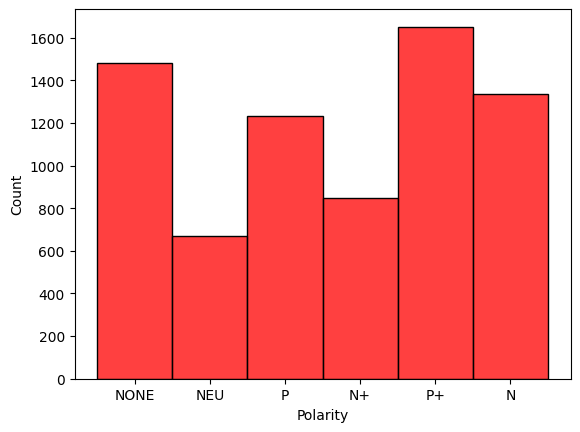

In [18]:
sns.histplot(df, x="Polarity", color="red");

### Ejercicio 3

Existe una columna de polaridad que será la que empleemos como target. Por simplicidad, queremos predecir simplemente si son comentarios positivos o negativos. Transforma el target en dos clases agrupando, ¿Qué deberíamos hacer con los comentarios neutrales o sin polaridad?

In [19]:
#a la columna polarity nqey sera la target tiene seis valores unciso ['NONE' 'NEU' 'P' 'N+' 'P+' 'N']
mapping=[1 if val in ["NEU","N+","P+"] else 0 for val in df["Polarity"]]
df["Polarity"]=mapping

In [20]:
#la columna user me la cargo pq no va aportatr informacion si solo que remeos saber si los comentarios son positivos ono, seria interesante si investiugaramos el sexo
#de la persona que lo realizo
df.drop(columns={"User"}, inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7219 entries, 0 to 7218
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Content     7218 non-null   object
 1   Lang        7219 non-null   object
 2   Polarity    7219 non-null   int64 
 3   Type        7219 non-null   int64 
 4   anyo        7219 non-null   int32 
 5   mes         7219 non-null   int32 
 6   Dia         7219 non-null   int32 
 7   Hora        7219 non-null   int32 
 8   Día_semana  7219 non-null   int32 
dtypes: int32(5), int64(2), object(2)
memory usage: 366.7+ KB


### Ejercicio 4

Continuando con la limpieza, elimina las filas que no están en español (1) y elimina la columna. Elimina también los duplicados.

In [22]:

df['Content'] = df['Content'].drop_duplicates()


In [23]:
df

,Content,Lang,Polarity,Type,anyo,mes,Dia,Hora,Día_semana
0,"Salgo de #VeoTV , que día más largoooooo...",es,0,1,2011,12,2,0,4
1,@PauladeLasHeras No te libraras de ayudar me/n...,es,1,0,2011,12,2,0,4
2,@marodriguezb Gracias MAR,es,0,1,2011,12,2,0,4
3,"Off pensando en el regalito Sinde, la que se v...",es,1,1,2011,12,2,2,4
4,Conozco a alguien q es adicto al drama! Ja ja ...,es,1,1,2011,12,2,2,4
...,...,...,...,...,...,...,...,...,...
7214,Muy indignante si ...nadie repara en ello hoy ...,es,1,1,2012,4,10,22,1
7215,Más pobres por discriminar a la mujer http://t...,es,1,1,2012,4,10,22,1
7216,Crean un banco de productos para mujeres con c...,es,0,1,2012,4,10,22,1
7217,Sobre la sorprendente huída hoy en el Senado d...,es,0,1,2012,4,10,23,1


### Ejercicio 5: Limpieza NLP (I)

Elimina signos de puntuación (puntos, comas, interrogaciones, paréntesis) (NOTA: Esta limpieza la haríamos sobre test de igual forma y no depende de los valores agregados o específico de test, por lo que se puede hacer antes del split)

In [24]:
REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])|(\d+)") # Si volvemos a las expresiones regulares, :-), en texto no queda otra si no eres un LLM
REPLACE_WITH_SPACE = re.compile("(<br \s*/><br\s*/>)|(\-)|(\/)|(_)")
NO_SPACE = ""
SPACE = " "


def clean_text(text):
    # Limpio signos y convierto a minúsculas
    dato = REPLACE_NO_SPACE.sub(NO_SPACE, text) # Equivale a re.sub("(\.)|(\;)|(\:)|(\!)|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])|(\d+)", NO_SPACE, row.lower())
    # Convierto los retornos de carro <br /><br /> en espacios y los guiones ("-")
    dato = REPLACE_WITH_SPACE.sub(SPACE, dato) # Equivale a re.sub("(<br \s*/><br\s*/>)|(\-)|(\/)|(_)", SPACE, dato)
    return dato

In [25]:
df['Content'] = df['Content'].astype(str)
df["Content_no_simb"]=df["Content"].apply(clean_text)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7219 entries, 0 to 7218
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Content          7219 non-null   object
 1   Lang             7219 non-null   object
 2   Polarity         7219 non-null   int64 
 3   Type             7219 non-null   int64 
 4   anyo             7219 non-null   int32 
 5   mes              7219 non-null   int32 
 6   Dia              7219 non-null   int32 
 7   Hora             7219 non-null   int32 
 8   Día_semana       7219 non-null   int32 
 9   Content_no_simb  7219 non-null   object
dtypes: int32(5), int64(2), object(3)
memory usage: 423.1+ KB


In [27]:
# Quito cualquier link
def remove_http(text):
    # Utilizamos una expresión regular para eliminar "http" y "https" de la cadena
    cleaned_text = re.sub(r'https?://\S+', '', text)
    return cleaned_text

df['Content_sin_http'] = df['Content'].apply(remove_http)



In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7219 entries, 0 to 7218
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Content           7219 non-null   object
 1   Lang              7219 non-null   object
 2   Polarity          7219 non-null   int64 
 3   Type              7219 non-null   int64 
 4   anyo              7219 non-null   int32 
 5   mes               7219 non-null   int32 
 6   Dia               7219 non-null   int32 
 7   Hora              7219 non-null   int32 
 8   Día_semana        7219 non-null   int32 
 9   Content_no_simb   7219 non-null   object
 10  Content_sin_http  7219 non-null   object
dtypes: int32(5), int64(2), object(4)
memory usage: 479.5+ KB


In [29]:
df

,Content,Lang,Polarity,Type,anyo,mes,Dia,Hora,Día_semana,Content_no_simb,Content_sin_http
0,"Salgo de #VeoTV , que día más largoooooo...",es,0,1,2011,12,2,0,4,Salgo de #VeoTV que día más largoooooo,"Salgo de #VeoTV , que día más largoooooo..."
1,@PauladeLasHeras No te libraras de ayudar me/n...,es,1,0,2011,12,2,0,4,@PauladeLasHeras No te libraras de ayudar me n...,@PauladeLasHeras No te libraras de ayudar me/n...
2,@marodriguezb Gracias MAR,es,0,1,2011,12,2,0,4,@marodriguezb Gracias MAR,@marodriguezb Gracias MAR
3,"Off pensando en el regalito Sinde, la que se v...",es,1,1,2011,12,2,2,4,Off pensando en el regalito Sinde la que se va...,"Off pensando en el regalito Sinde, la que se v..."
4,Conozco a alguien q es adicto al drama! Ja ja ...,es,1,1,2011,12,2,2,4,Conozco a alguien q es adicto al drama Ja ja j...,Conozco a alguien q es adicto al drama! Ja ja ...
...,...,...,...,...,...,...,...,...,...,...,...
7214,Muy indignante si ...nadie repara en ello hoy ...,es,1,1,2012,4,10,22,1,Muy indignante si nadie repara en ello hoy aqu...,Muy indignante si ...nadie repara en ello hoy ...
7215,Más pobres por discriminar a la mujer http://t...,es,1,1,2012,4,10,22,1,Más pobres por discriminar a la mujer http tc...,Más pobres por discriminar a la mujer
7216,Crean un banco de productos para mujeres con c...,es,0,1,2012,4,10,22,1,Crean un banco de productos para mujeres con c...,Crean un banco de productos para mujeres con c...
7217,Sobre la sorprendente huída hoy en el Senado d...,es,0,1,2012,4,10,23,1,Sobre la sorprendente huída hoy en el Senado d...,Sobre la sorprendente huída hoy en el Senado d...


### Ejercicio 7: Limpieza NLP (III)

Elimina stopwords, apoyate en el diccionario de stopwords de español de Nltk.

In [30]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")

# Obtener la lista de stopwords en español
stopwords_es = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/vicevil/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
def eliminar_stopwords(text):
    # Dividir el texto en palabras
    palabras = text.split()
    # Eliminar las stopwords
    palabras_sin_stopwords = [word for word in palabras if word.lower() not in stopwords_es]
    # Unir las palabras sin stopwords de nuevo en una cadena
    cleaned_text = ' '.join(palabras_sin_stopwords)
    return cleaned_text

In [32]:
df['Content_stopwords'] = df['Content'].apply(eliminar_stopwords)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7219 entries, 0 to 7218
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Content            7219 non-null   object
 1   Lang               7219 non-null   object
 2   Polarity           7219 non-null   int64 
 3   Type               7219 non-null   int64 
 4   anyo               7219 non-null   int32 
 5   mes                7219 non-null   int32 
 6   Dia                7219 non-null   int32 
 7   Hora               7219 non-null   int32 
 8   Día_semana         7219 non-null   int32 
 9   Content_no_simb    7219 non-null   object
 10  Content_sin_http   7219 non-null   object
 11  Content_stopwords  7219 non-null   object
dtypes: int32(5), int64(2), object(5)
memory usage: 535.9+ KB


### Ejercicio 8:

Aplica un stemmer guardando el resultado en una columna nueva, no pierdas la resultante de todas las limpiezas anteriores.

In [34]:
df.Content

0             Salgo de #VeoTV , que día más largoooooo...
1       @PauladeLasHeras No te libraras de ayudar me/n...
2                               @marodriguezb Gracias MAR
3       Off pensando en el regalito Sinde, la que se v...
4       Conozco a alguien q es adicto al drama! Ja ja ...
                              ...                        
7214    Muy indignante si ...nadie repara en ello hoy ...
7215    Más pobres por discriminar a la mujer http://t...
7216    Crean un banco de productos para mujeres con c...
7217    Sobre la sorprendente huída hoy en el Senado d...
7218    #CorreMarianoCorre está muy bien pero la versi...
Name: Content, Length: 7219, dtype: object

In [35]:
def arroba(text):
    cleaned_text = re.sub(r'[@#]', '', text) 
    return arroba

df['Content_sin_arroba'] = df["Content"].apply(arroba)

In [38]:
df

,Content,Lang,Polarity,Type,anyo,mes,Dia,Hora,Día_semana,Content_no_simb,Content_sin_http,Content_stopwords,Content_sin_arroba
0,"Salgo de #VeoTV , que día más largoooooo...",es,0,1,2011,12,2,0,4,Salgo de #VeoTV que día más largoooooo,"Salgo de #VeoTV , que día más largoooooo...","Salgo #VeoTV , día largoooooo...",<function arroba at 0x7f88ce72e8c0>
1,@PauladeLasHeras No te libraras de ayudar me/n...,es,1,0,2011,12,2,0,4,@PauladeLasHeras No te libraras de ayudar me n...,@PauladeLasHeras No te libraras de ayudar me/n...,@PauladeLasHeras libraras ayudar me/nos. Besos...,<function arroba at 0x7f88ce72e8c0>
2,@marodriguezb Gracias MAR,es,0,1,2011,12,2,0,4,@marodriguezb Gracias MAR,@marodriguezb Gracias MAR,@marodriguezb Gracias MAR,<function arroba at 0x7f88ce72e8c0>
3,"Off pensando en el regalito Sinde, la que se v...",es,1,1,2011,12,2,2,4,Off pensando en el regalito Sinde la que se va...,"Off pensando en el regalito Sinde, la que se v...","Off pensando regalito Sinde, va SGAE van corru...",<function arroba at 0x7f88ce72e8c0>
4,Conozco a alguien q es adicto al drama! Ja ja ...,es,1,1,2011,12,2,2,4,Conozco a alguien q es adicto al drama Ja ja j...,Conozco a alguien q es adicto al drama! Ja ja ...,Conozco alguien q adicto drama! Ja ja ja suena...,<function arroba at 0x7f88ce72e8c0>
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7214,Muy indignante si ...nadie repara en ello hoy ...,es,1,1,2012,4,10,22,1,Muy indignante si nadie repara en ello hoy aqu...,Muy indignante si ...nadie repara en ello hoy ...,indignante si ...nadie repara ello hoy aqui . ...,<function arroba at 0x7f88ce72e8c0>
7215,Más pobres por discriminar a la mujer http://t...,es,1,1,2012,4,10,22,1,Más pobres por discriminar a la mujer http tc...,Más pobres por discriminar a la mujer,pobres discriminar mujer http://t.co/4T29uZlh,<function arroba at 0x7f88ce72e8c0>
7216,Crean un banco de productos para mujeres con c...,es,0,1,2012,4,10,22,1,Crean un banco de productos para mujeres con c...,Crean un banco de productos para mujeres con c...,Crean banco productos mujeres cáncer mama http...,<function arroba at 0x7f88ce72e8c0>
7217,Sobre la sorprendente huída hoy en el Senado d...,es,0,1,2012,4,10,23,1,Sobre la sorprendente huída hoy en el Senado d...,Sobre la sorprendente huída hoy en el Senado d...,sorprendente huída hoy Senado Rajoy http://t.c...,<function arroba at 0x7f88ce72e8c0>


In [36]:
from nltk.stem import PorterStemmer
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/vicevil/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [39]:
def spanish_stemmer(x):
    stemmer = SnowballStemmer('spanish')
    return " ".join([stemmer.stem(word) for word in x.split()])

df['Content_Stemmed'] = df['Content'].apply(spanish_stemmer)
df['Content_Stemmed'].head()


0           salg de #veotv , que dia mas largoooooo...
1    @pauladelasher no te libr de ayud me/nos. bes ...
2                              @marodriguezb graci mar
3    off pens en el regalit sinde, la que se va de ...
4    conozc a algui q es adict al drama! ja ja ja t...
Name: Content_Stemmed, dtype: object

In [40]:
df

,Content,Lang,Polarity,Type,anyo,mes,Dia,Hora,Día_semana,Content_no_simb,Content_sin_http,Content_stopwords,Content_sin_arroba,Content_Stemmed
0,"Salgo de #VeoTV , que día más largoooooo...",es,0,1,2011,12,2,0,4,Salgo de #VeoTV que día más largoooooo,"Salgo de #VeoTV , que día más largoooooo...","Salgo #VeoTV , día largoooooo...",<function arroba at 0x7f88ce72e8c0>,"salg de #veotv , que dia mas largoooooo..."
1,@PauladeLasHeras No te libraras de ayudar me/n...,es,1,0,2011,12,2,0,4,@PauladeLasHeras No te libraras de ayudar me n...,@PauladeLasHeras No te libraras de ayudar me/n...,@PauladeLasHeras libraras ayudar me/nos. Besos...,<function arroba at 0x7f88ce72e8c0>,@pauladelasher no te libr de ayud me/nos. bes ...
2,@marodriguezb Gracias MAR,es,0,1,2011,12,2,0,4,@marodriguezb Gracias MAR,@marodriguezb Gracias MAR,@marodriguezb Gracias MAR,<function arroba at 0x7f88ce72e8c0>,@marodriguezb graci mar
3,"Off pensando en el regalito Sinde, la que se v...",es,1,1,2011,12,2,2,4,Off pensando en el regalito Sinde la que se va...,"Off pensando en el regalito Sinde, la que se v...","Off pensando regalito Sinde, va SGAE van corru...",<function arroba at 0x7f88ce72e8c0>,"off pens en el regalit sinde, la que se va de ..."
4,Conozco a alguien q es adicto al drama! Ja ja ...,es,1,1,2011,12,2,2,4,Conozco a alguien q es adicto al drama Ja ja j...,Conozco a alguien q es adicto al drama! Ja ja ...,Conozco alguien q adicto drama! Ja ja ja suena...,<function arroba at 0x7f88ce72e8c0>,conozc a algui q es adict al drama! ja ja ja t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7214,Muy indignante si ...nadie repara en ello hoy ...,es,1,1,2012,4,10,22,1,Muy indignante si nadie repara en ello hoy aqu...,Muy indignante si ...nadie repara en ello hoy ...,indignante si ...nadie repara ello hoy aqui . ...,<function arroba at 0x7f88ce72e8c0>,muy indign si ...nadi rep en ello hoy aqui . g...
7215,Más pobres por discriminar a la mujer http://t...,es,1,1,2012,4,10,22,1,Más pobres por discriminar a la mujer http tc...,Más pobres por discriminar a la mujer,pobres discriminar mujer http://t.co/4T29uZlh,<function arroba at 0x7f88ce72e8c0>,mas pobr por discrimin a la muj http://t.co/4t...
7216,Crean un banco de productos para mujeres con c...,es,0,1,2012,4,10,22,1,Crean un banco de productos para mujeres con c...,Crean un banco de productos para mujeres con c...,Crean banco productos mujeres cáncer mama http...,<function arroba at 0x7f88ce72e8c0>,cre un banc de product par mujer con canc de m...
7217,Sobre la sorprendente huída hoy en el Senado d...,es,0,1,2012,4,10,23,1,Sobre la sorprendente huída hoy en el Senado d...,Sobre la sorprendente huída hoy en el Senado d...,sorprendente huída hoy Senado Rajoy http://t.c...,<function arroba at 0x7f88ce72e8c0>,sobr la sorprendent huid hoy en el sen de rajo...


### Ejercicio 9

Crea dos dataframes. Uno con la columna obtenida en el ejercicio 7 y el target, otro con la columna obtenida en el ejercicio 8 y el target.

In [51]:
df1=pd.DataFrame({"Contenido_stopwords": df["Content_stopwords"], "Target":df["Polarity"]})

In [61]:
df1

,Contenido_stopwords,Target
0,"Salgo #VeoTV , día largoooooo...",0
1,@PauladeLasHeras libraras ayudar me/nos. Besos...,1
2,@marodriguezb Gracias MAR,0
3,"Off pensando regalito Sinde, va SGAE van corru...",1
4,Conozco alguien q adicto drama! Ja ja ja suena...,1
...,...,...
7214,indignante si ...nadie repara ello hoy aqui . ...,1
7215,pobres discriminar mujer http://t.co/4T29uZlh,1
7216,Crean banco productos mujeres cáncer mama http...,0
7217,sorprendente huída hoy Senado Rajoy http://t.c...,0


In [62]:
df2=pd.DataFrame({"Contenido_stemmed": df["Content_Stemmed"], "Target":df["Polarity"]})

In [53]:
df2

,Contenido_stemmed,Target
0,"salg de #veotv , que dia mas largoooooo...",0
1,@pauladelasher no te libr de ayud me/nos. bes ...,1
2,@marodriguezb graci mar,0
3,"off pens en el regalit sinde, la que se va de ...",1
4,conozc a algui q es adict al drama! ja ja ja t...,1
...,...,...
7214,muy indign si ...nadi rep en ello hoy aqui . g...,1
7215,mas pobr por discrimin a la muj http://t.co/4t...,1
7216,cre un banc de product par mujer con canc de m...,0
7217,sobr la sorprendent huid hoy en el sen de rajo...,0


In [54]:
print(df1.shape)
print(df2.shape)

(7219, 2)
(7219, 2)


### Ejercicio 10: Train y Test

En esta ocasión hemos retrasado el split, podríamos haberlo hecho mucho antes, pero no afecta porque la limpieza hasta ahora no tenía en cuenta valores agregados y sería la misma en uno y otro dataset. Pero ahora crea el train y test para ambos dataframes. Muestra la distribución del target.


In [63]:
X1=df1.drop(["Target"], axis=1)
y1=df1["Target"]
X2=df2.drop(["Target"], axis=1)
y2=df2["Target"]

In [64]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X1,y1, test_size=0.2, random_state=42)
X_train2,X_test2,y_train2,y_test2=train_test_split(X2,y2, test_size=0.2, random_state=42)

### Ejercicio 11: Vectorizacion BoW no binaria.

Vectoriza las columnas de texto de los dataframes del ejercicio anterior con un BoW no binario, usando CountVectorizer (limita el vocabulario a 10000 tokens, los más ). No deshagas las matrices dispersas.

In [66]:
prepro_vectorizer1 = CountVectorizer(binary = False, max_features = 10000) 
X_vectors_train_freq1 = prepro_vectorizer1.fit_transform(X_train1["Contenido_stopwords"]) # Los vamos a manetener como sparse matrix para acelerar los entrenamientos
X_vectors_test_freq1 = prepro_vectorizer1.transform(X_test1["Contenido_stopwords"])

In [67]:
prepro_vectorizer2 = CountVectorizer(binary = False, max_features = 10000)
X_vectors_train_freq2 = prepro_vectorizer2.fit_transform(X_train2["Contenido_stemmed"]) # Los vamos a manetener como sparse matrix para acelerar los entrenamientos
X_vectors_test_freq2 = prepro_vectorizer2.transform(X_test2["Contenido_stemmed"])

In [77]:
df_train_vectorized_bow_freq1 = pd.DataFrame(X_vectors_train_freq1.toarray(), columns = prepro_vectorizer1.get_feature_names_out())
df_test_vectorized_bow_freq1 = pd.DataFrame(X_vectors_test_freq1.toarray(), columns = prepro_vectorizer1.get_feature_names_out())
df_train_vectorized_bow_freq2 = pd.DataFrame(X_vectors_train_freq2.toarray(), columns = prepro_vectorizer2.get_feature_names_out())
df_test_vectorized_bow_freq2 = pd.DataFrame(X_vectors_test_freq2.toarray(), columns = prepro_vectorizer2.get_feature_names_out())

In [78]:
df_train_vectorized_bow_freq2

,00,000,000m,000mill,00h,02,03,08,09,0l0hzkdb,...,zxfjllsg,zxvuaqtl,zz0vy1c7,zznyzk,zzz,zzzzz,zürich,ña,お元気ですか,心から応援しています
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5770,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5771,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5772,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5773,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
df_train_vectorized_bow_freq1

,00,000,000m,000mill,00h,02,03,08,09,0l0hzkdb,...,último,últimos,única,únicas,único,únicos,útil,útiles,お元気ですか,心から応援しています
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5770,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5771,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5772,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5773,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Ejercicio 12:

Escoge un modelo sencillo para hacer el entrenamiento en cada uno de los dos datasets (sin stemmer y con stemmer). Entrenalos ajustando sus hiperparámetros a la vez y compara sus resultados contra test.

In [81]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [86]:
rf=RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42)
rf.fit(X_vectors_train_freq1, y_train1)
y_pred1= rf.predict(X_vectors_test_freq1)
print(f"el informe para el df1 es: \n {classification_report(y_pred1, y_test1)}")

rf2=RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42)
rf2.fit(X_vectors_train_freq2, y_train2)
y_pred2= rf.predict(X_vectors_test_freq2)
print(f"el informe para el df2 es: \n {classification_report(y_pred2, y_test2)}")

el informe para el df1 es: 
               precision    recall  f1-score   support

           0       1.00      0.58      0.73      1443
           1       0.00      1.00      0.00         1

    accuracy                           0.58      1444
   macro avg       0.50      0.79      0.37      1444
weighted avg       1.00      0.58      0.73      1444

el informe para el df2 es: 
               precision    recall  f1-score   support

           0       1.00      0.58      0.73      1444
           1       0.00      0.00      0.00         0

    accuracy                           0.58      1444
   macro avg       0.50      0.29      0.37      1444
weighted avg       1.00      0.58      0.73      1444



/home/vicevil/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vicevil/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vicevil/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [88]:
dt=DecisionTreeClassifier(max_depth=5, min_samples_split=5,min_samples_leaf=5, random_state=42)
dt.fit(X_vectors_train_freq1, y_train1)
y_pred11= rf.predict(X_vectors_test_freq1)
print(f"el informe para el df1 es: \n {classification_report(y_pred11, y_test1)}")

dt2=DecisionTreeClassifier(max_depth=5, min_samples_split=5,min_samples_leaf=5, random_state=42)
dt2.fit(X_vectors_train_freq2, y_train2)
y_pred22= rf.predict(X_vectors_test_freq2)
print(f"el informe para el df2 es: \n {classification_report(y_pred22, y_test2)}")

el informe para el df1 es: 
               precision    recall  f1-score   support

           0       1.00      0.58      0.73      1443
           1       0.00      1.00      0.00         1

    accuracy                           0.58      1444
   macro avg       0.50      0.79      0.37      1444
weighted avg       1.00      0.58      0.73      1444

el informe para el df2 es: 
               precision    recall  f1-score   support

           0       1.00      0.58      0.73      1444
           1       0.00      0.00      0.00         0

    accuracy                           0.58      1444
   macro avg       0.50      0.29      0.37      1444
weighted avg       1.00      0.58      0.73      1444



/home/vicevil/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vicevil/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vicevil/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [89]:
svc=LinearSVC()
svc.fit(X_vectors_train_freq1, y_train1)
y_pred111= rf.predict(X_vectors_test_freq1)
print(f"el informe para el df1 es: \n {classification_report(y_pred111, y_test1)}")

vsc=LinearSVC()
vsc.fit(X_vectors_train_freq2, y_train2)
y_pred222= rf.predict(X_vectors_test_freq2)
print(f"el informe para el df2 es: \n {classification_report(y_pred222, y_test2)}")

el informe para el df1 es: 
               precision    recall  f1-score   support

           0       1.00      0.58      0.73      1443
           1       0.00      1.00      0.00         1

    accuracy                           0.58      1444
   macro avg       0.50      0.79      0.37      1444
weighted avg       1.00      0.58      0.73      1444

el informe para el df2 es: 
               precision    recall  f1-score   support

           0       1.00      0.58      0.73      1444
           1       0.00      0.00      0.00         0

    accuracy                           0.58      1444
   macro avg       0.50      0.29      0.37      1444
weighted avg       1.00      0.58      0.73      1444



/home/vicevil/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/vicevil/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/vicevil/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vicevil/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.

### Ejercicio 13

Realiza un pequeño análisis de resultados, pega la predicción al  train de test del mejor de los datasets anteriores y comprueba 3 tuists acertados y 3 tuist no acertados, leyendo el texto, piensa la polaridad que le darías (Negatia o Positiva) y luego comprueba el target y la predicción.

In [106]:
Target='Polarity'

In [91]:
test_set_full = df.loc[X_test2.index].copy() # Aprovechamos que los sets mantienen los índices para poder recuperar los textos originales
test_set_full["prediccion"] = y_pred222

In [104]:
test_set_full

,Content,Lang,Polarity,Type,anyo,mes,Dia,Hora,Día_semana,Content_no_simb,Content_sin_http,Content_stopwords,Content_sin_arroba,Content_Stemmed,prediccion
308,@sanchez_sonia ya nos contarás si explota Euro...,es,0,1,2011,12,8,17,3,@sanchez sonia ya nos contarás si explota Euro...,@sanchez_sonia ya nos contarás si explota Euro...,@sanchez_sonia contarás si explota Europa (com...,<function arroba at 0x7f88ce72e8c0>,@sanchez_soni ya nos cont si explot europ (com...,0
381,Jajajajajja la mierda del nuevo twitter locooo...,es,1,1,2011,12,10,12,5,Jajajajajja la mierda del nuevo twitter locooo...,Jajajajajja la mierda del nuevo twitter locooo...,Jajajajajja mierda nuevo twitter locooooo tien...,<function arroba at 0x7f88ce72e8c0>,jajajajajj la mierd del nuev twitt locoooo me ...,0
4936,"Hoy es el día de Andalucía, esa tierra con ban...",es,1,1,2012,2,28,8,1,Hoy es el día de Andalucía esa tierra con band...,"Hoy es el día de Andalucía, esa tierra con ban...","Hoy día Andalucía, tierra bandera blanquiverde...",<function arroba at 0x7f88ce72e8c0>,"hoy es el dia de andalucia, esa tierr con band...",0
2312,Rajoy viaja en AVE para dar su primer discurso...,es,0,1,2012,1,14,10,5,Rajoy viaja en AVE para dar su primer discurso...,Rajoy viaja en AVE para dar su primer discurso...,"Rajoy viaja AVE dar primer discurso publico, m...",<function arroba at 0x7f88ce72e8c0>,rajoy viaj en ave par dar su prim discurs publ...,0
251,"RT @nurvaca: Sr. Mas, no garantizar una sanida...",es,0,1,2011,12,6,23,1,RT @nurvaca Sr Mas no garantizar una sanidad p...,"RT @nurvaca: Sr. Mas, no garantizar una sanida...","RT @nurvaca: Sr. Mas, garantizar sanidad publi...",<function arroba at 0x7f88ce72e8c0>,"rt @nurvaca: sr. mas, no garantiz una sanid pu...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4043,Echad un vistazo a esta foto: http://t.co/BNHy...,es,0,1,2012,2,11,23,5,Echad un vistazo a esta foto http tco BNHyFWm...,Echad un vistazo a esta foto: en Mujeres del ...,Echad vistazo foto: http://t.co/BNHyFWmr Mujer...,<function arroba at 0x7f88ce72e8c0>,echad un vistaz a esta foto: http://t.co/bnhyf...,0
6223,"Ahora bien dicho lo cual, pese a todo ganaremo...",es,0,1,2012,3,21,23,2,Ahora bien dicho lo cual pese a todo ganaremos...,"Ahora bien dicho lo cual, pese a todo ganaremo...","Ahora bien dicho cual, pese ganaremos liga, ar...",<function arroba at 0x7f88ce72e8c0>,"ahor bien dich lo cual, pes a tod gan la liga,...",0
5551,Convertiremos Bruselas en la novena provincia ...,es,0,1,2012,3,10,12,5,Convertiremos Bruselas en la novena provincia ...,Convertiremos Bruselas en la novena provincia ...,Convertiremos Bruselas novena provincia priori...,<function arroba at 0x7f88ce72e8c0>,convert brusel en la noven provinci de las pri...,0
4959,Mi columna de esta semana en El Mundo de la Co...,es,0,1,2012,2,28,16,1,Mi columna de esta semana en El Mundo de la Co...,Mi columna de esta semana en El Mundo de la Co...,"columna semana Mundo Comunidad Valenciana. "" s...",<function arroba at 0x7f88ce72e8c0>,mi column de esta seman en el mund de la comun...,0


In [112]:
print(test_set_full.shape)

(1444, 15)


In [129]:
print(y_test2.shape)

(1444,)


In [133]:
acertados = test_set_full[test_set_full[Target] == test_set_full["prediccion"]].copy()
fallados = test_set_full[y_test2 != test_set_full["prediccion"]].copy()

In [142]:
acertados


,Content,Lang,Polarity,Type,anyo,mes,Dia,Hora,Día_semana,Content_no_simb,Content_sin_http,Content_stopwords,Content_sin_arroba,Content_Stemmed,prediccion
308,@sanchez_sonia ya nos contarás si explota Euro...,es,0,1,2011,12,8,17,3,@sanchez sonia ya nos contarás si explota Euro...,@sanchez_sonia ya nos contarás si explota Euro...,@sanchez_sonia contarás si explota Europa (com...,<function arroba at 0x7f88ce72e8c0>,@sanchez_soni ya nos cont si explot europ (com...,0
2312,Rajoy viaja en AVE para dar su primer discurso...,es,0,1,2012,1,14,10,5,Rajoy viaja en AVE para dar su primer discurso...,Rajoy viaja en AVE para dar su primer discurso...,"Rajoy viaja AVE dar primer discurso publico, m...",<function arroba at 0x7f88ce72e8c0>,rajoy viaj en ave par dar su prim discurs publ...,0
251,"RT @nurvaca: Sr. Mas, no garantizar una sanida...",es,0,1,2011,12,6,23,1,RT @nurvaca Sr Mas no garantizar una sanidad p...,"RT @nurvaca: Sr. Mas, no garantizar una sanida...","RT @nurvaca: Sr. Mas, garantizar sanidad publi...",<function arroba at 0x7f88ce72e8c0>,"rt @nurvaca: sr. mas, no garantiz una sanid pu...",0
5955,Ya estaban tardando los q meten miedo en andal...,es,0,1,2012,3,16,19,4,Ya estaban tardando los q meten miedo en andal...,Ya estaban tardando los q meten miedo en andal...,tardando q meten miedo andalucia decir si gana...,<function arroba at 0x7f88ce72e8c0>,ya estab tard los q met mied en andaluci en de...,0
6714,El recorte es de 27.300 millones de euros #CMin,es,0,1,2012,3,30,14,4,El recorte es de millones de euros #CMin,El recorte es de 27.300 millones de euros #CMin,recorte 27.300 millones euros #CMin,<function arroba at 0x7f88ce72e8c0>,el recort es de 27.300 millon de eur #cmin,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399,Dos figuras ahora en cartel!#lachispadelavida ...,es,0,1,2012,1,15,17,6,Dos figuras ahora en cartel#lachispadelavida h...,Dos figuras ahora en cartel!#lachispadelavida,Dos figuras ahora cartel!#lachispadelavida htt...,<function arroba at 0x7f88ce72e8c0>,dos figur ahor en cartel!#lachispadelav http:/...,0
4043,Echad un vistazo a esta foto: http://t.co/BNHy...,es,0,1,2012,2,11,23,5,Echad un vistazo a esta foto http tco BNHyFWm...,Echad un vistazo a esta foto: en Mujeres del ...,Echad vistazo foto: http://t.co/BNHyFWmr Mujer...,<function arroba at 0x7f88ce72e8c0>,echad un vistaz a esta foto: http://t.co/bnhyf...,0
6223,"Ahora bien dicho lo cual, pese a todo ganaremo...",es,0,1,2012,3,21,23,2,Ahora bien dicho lo cual pese a todo ganaremos...,"Ahora bien dicho lo cual, pese a todo ganaremo...","Ahora bien dicho cual, pese ganaremos liga, ar...",<function arroba at 0x7f88ce72e8c0>,"ahor bien dich lo cual, pes a tod gan la liga,...",0
5551,Convertiremos Bruselas en la novena provincia ...,es,0,1,2012,3,10,12,5,Convertiremos Bruselas en la novena provincia ...,Convertiremos Bruselas en la novena provincia ...,Convertiremos Bruselas novena provincia priori...,<function arroba at 0x7f88ce72e8c0>,convert brusel en la noven provinci de las pri...,0


In [143]:
fallados

,Content,Lang,Polarity,Type,anyo,mes,Dia,Hora,Día_semana,Content_no_simb,Content_sin_http,Content_stopwords,Content_sin_arroba,Content_Stemmed,prediccion
381,Jajajajajja la mierda del nuevo twitter locooo...,es,1,1,2011,12,10,12,5,Jajajajajja la mierda del nuevo twitter locooo...,Jajajajajja la mierda del nuevo twitter locooo...,Jajajajajja mierda nuevo twitter locooooo tien...,<function arroba at 0x7f88ce72e8c0>,jajajajajj la mierd del nuev twitt locoooo me ...,0
4936,"Hoy es el día de Andalucía, esa tierra con ban...",es,1,1,2012,2,28,8,1,Hoy es el día de Andalucía esa tierra con band...,"Hoy es el día de Andalucía, esa tierra con ban...","Hoy día Andalucía, tierra bandera blanquiverde...",<function arroba at 0x7f88ce72e8c0>,"hoy es el dia de andalucia, esa tierr con band...",0
2903,Andalucía está comprometida con la estabilidad...,es,1,1,2012,1,25,10,2,Andalucía está comprometida con la estabilidad...,Andalucía está comprometida con la estabilidad...,"Andalucía comprometida estabilidad, exigimos l...",<function arroba at 0x7f88ce72e8c0>,"andaluc esta compromet con la estabilidad, per...",0
5700,En Europa alguna banca privada ha quebrado o c...,es,1,1,2012,3,13,7,1,En Europa alguna banca privada ha quebrado o c...,En Europa alguna banca privada ha quebrado o c...,Europa alguna banca privada quebrado casi. acu...,<function arroba at 0x7f88ce72e8c0>,en europ algun banc priv ha quebr o casi. el e...,0
3006,Me alegra que el club recurra mi segunda tarje...,es,1,0,2012,1,26,14,3,Me alegra que el club recurra mi segunda tarje...,Me alegra que el club recurra mi segunda tarje...,alegra club recurra segunda tarjeta amarilla p...,<function arroba at 0x7f88ce72e8c0>,me alegr que el club recurr mi segund tarjet a...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,La suerte de la fea la guapa la desea #tipicas...,es,1,1,2011,12,10,8,5,La suerte de la fea la guapa la desea #tipicas...,La suerte de la fea la guapa la desea #tipicas...,suerte fea guapa desea #tipicasfrasesdeabuela,<function arroba at 0x7f88ce72e8c0>,la suert de la fea la guap la dese #tipicasfra...,0
5828,;) RT @Yaneth1: Felicidades a @OscarCruzVM y a...,es,1,1,2012,3,14,20,2,RT @Yaneth Felicidades a @OscarCruzVM y a @Al...,;) RT @Yaneth1: Felicidades a @OscarCruzVM y a...,;) RT @Yaneth1: Felicidades @OscarCruzVM @Aleo...,<function arroba at 0x7f88ce72e8c0>,;) rt @yaneth1: felic a @oscarcruzvm y a @aleo...,0
5714,Cataluña asegura que da 16.000mill +de lo que ...,es,1,1,2012,3,13,9,1,Cataluña asegura que da mill +de lo que recibe...,Cataluña asegura que da 16.000mill +de lo que ...,Cataluña asegura da 16.000mill +de recibe http...,<function arroba at 0x7f88ce72e8c0>,cataluñ asegur que da 16.000mill +de lo que re...,0
4932,"Tres años de instrucción, uno y medio de suspe...",es,1,1,2012,2,28,7,1,Tres años de instrucción uno y medio de suspen...,"Tres años de instrucción, uno y medio de suspe...","Tres años instrucción, medio suspensión juez G...",<function arroba at 0x7f88ce72e8c0>,"tres años de instruccion, uno y medi de suspen...",0


In [144]:
df_ok = acertados.sample(3, random_state= 42)
for texto in df_ok["Content"].values:
    print(texto)

Me gusta que el Canijo sea TT. Tengo ganas de ver lo que trae este año!
Si es que aún lo tengo tan presente!!!! http://t.co/UfVWKq1O
Y aquí el equipo del Telediario matinal haciendo el traspaso de poderes a #losdesayunosdetve http://t.co/163jKTi8


In [145]:
df_ok[[Target,"prediccion"]]

,Polarity,prediccion
2722,0,0
1971,0,0
2045,0,0
